# PCA for TIPS Data

## Preparing the Data

In [26]:
import pandas as pd

### Index meaning

Two columns will be useful in estimating the volatility structure:
<ol>
    <li><code>TIPSFXX</code>: The instantaneous TIPS real rates observed at time <code>Date</code> with maturity <code>XX</code></li>
    <li><code>BKEVENXX</code>: The breakeven inflation rates for maturities <code>XX</code></li>
</ol>
Notice that the nominal rate specified here is <code>NOMINALXX</code>=<code>TIPSFXX</code>+<code>BKEVENXX</code>.

In [22]:
# Modify the filepath to your local path
file_path = 'change_this_to_your_local_path/feds200805.csv'

dataset = pd.read_csv(file_path, skiprows=18)  

TIPSF_s = dataset.columns.get_loc('TIPSF02')
TIPSF_e = dataset.columns.get_loc('TIPSPY02')

TIPSF = dataset.iloc[:, TIPSF_s:TIPSF_e]

print(TIPSF.head())


   TIPSF02  TIPSF03  TIPSF04  TIPSF05  TIPSF06  TIPSF07  TIPSF08  TIPSF09  \
0   3.8641   3.9278   3.9689   3.9917   3.9994   3.9951   3.9811   3.9597   
1   3.9295   4.0066   4.0297   4.0193   3.9893   3.9492   3.9051   3.8608   
2   6.7708   5.0996   4.2070   3.8544   3.7311   3.6907   3.6780   3.6741   
3   6.8983   5.2071   4.2485   3.8517   3.7065   3.6569   3.6407   3.6355   
4   3.9638   4.0383   4.0220   3.9666   3.8997   3.8348   3.7778   3.7306   

   TIPSF10  TIPSF11  TIPSF12  TIPSF13  TIPSF14  TIPSF15  TIPSF16  TIPSF17  \
0   3.9325   3.9011   3.8666   3.8300   3.7922   3.7538   3.7154   3.6775   
1   3.8188   3.7802   3.7456   3.7153   3.6890   3.6665   3.6474   3.6314   
2   3.6729   3.6726   3.6725   3.6725   3.6724   3.6724   3.6724   3.6724   
3   3.6339   3.6334   3.6332   3.6332   3.6332   3.6332   3.6331   3.6331   
4   3.6929   3.6635   3.6411   3.6243   3.6118   3.6025   3.5958   3.5909   

   TIPSF18  TIPSF19  TIPSF20  
0   3.6403   3.6042   3.5692  
1   3.6179  

Columns with label `TIPS1FXX` stands for the one-year forward rate(instead of instantaneous). Intuitively, instead of taking continuous differential between the action of borrowing and lending, the time interval between such actions is of one year (yearly based diffrence). So is `TIPS5FXX`.

We will be keeping only the columns `TIPSFXX` mentioned above and drop all other irrelevant columns before proceeding with our analysis. The difference rate is good in practice but due to lack of variation in maturity here, it wouldn't be the best choice to PCA it. Hence only PCA on real `TIPS` rate with continuous compounding is analyzed. Nevertheless the notebook is open to any more analysis.

In [ ]:
TIPS1F_s = dataset.columns.get_loc('TIPS1F04')
TIPS1F_e = dataset.columns.get_loc('TIPSPY02')

TIPSF = dataset.iloc[:, TIPSF_s:TIPSF_e]

print(TIPSF.head())

In [24]:
TIPSF.columns

Index(['TIPSF02', 'TIPSF03', 'TIPSF04', 'TIPSF05', 'TIPSF06', 'TIPSF07',
       'TIPSF08', 'TIPSF09', 'TIPSF10', 'TIPSF11', 'TIPSF12', 'TIPSF13',
       'TIPSF14', 'TIPSF15', 'TIPSF16', 'TIPSF17', 'TIPSF18', 'TIPSF19',
       'TIPSF20'],
      dtype='object')

## Principal Component Analysis

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

TIPSF_data = TIPSF.dropna()  

# Standardize the data
scaler = StandardScaler()
TIPSF_data_standardized = scaler.fit_transform(TIPSF_data)

pca = PCA()
TIPSF_pca = pca.fit_transform(TIPSF_data_standardized)

# Display loadings (eigenvectors)
loadings = pd.DataFrame(pca.components_, columns=TIPSF_data.columns)
print(loadings.head())


    TIPSF02   TIPSF03   TIPSF04   TIPSF05   TIPSF06   TIPSF07   TIPSF08  \
0  0.204146  0.216336  0.223798  0.228701  0.231675  0.233222  0.233789   
1  0.540735  0.457487  0.356113  0.255557  0.161824  0.077916  0.005435   
2  0.313163  0.117192 -0.045004 -0.161343 -0.235950 -0.274351 -0.282604   
3  0.540265  0.049742 -0.187201 -0.265851 -0.251792 -0.186062 -0.095892   
4  0.412238 -0.277779 -0.361652 -0.211339 -0.015691  0.142195  0.232440   

    TIPSF09   TIPSF10   TIPSF11   TIPSF12   TIPSF13   TIPSF14   TIPSF15  \
0  0.233745  0.233378  0.232899  0.232451  0.232117  0.231939  0.231914   
1 -0.054963 -0.103303 -0.140091 -0.166138 -0.182408 -0.189897 -0.189544   
2 -0.266866 -0.232883 -0.185597 -0.128999 -0.066130  0.000832  0.070412   
3 -0.000198  0.087758  0.158894  0.207272  0.229245  0.222769  0.186838   
4  0.252104  0.211980  0.129417  0.024137 -0.084070 -0.176684 -0.237000   

    TIPSF16   TIPSF17   TIPSF18   TIPSF19   TIPSF20  
0  0.231992  0.232061  0.231912  0.231212  0

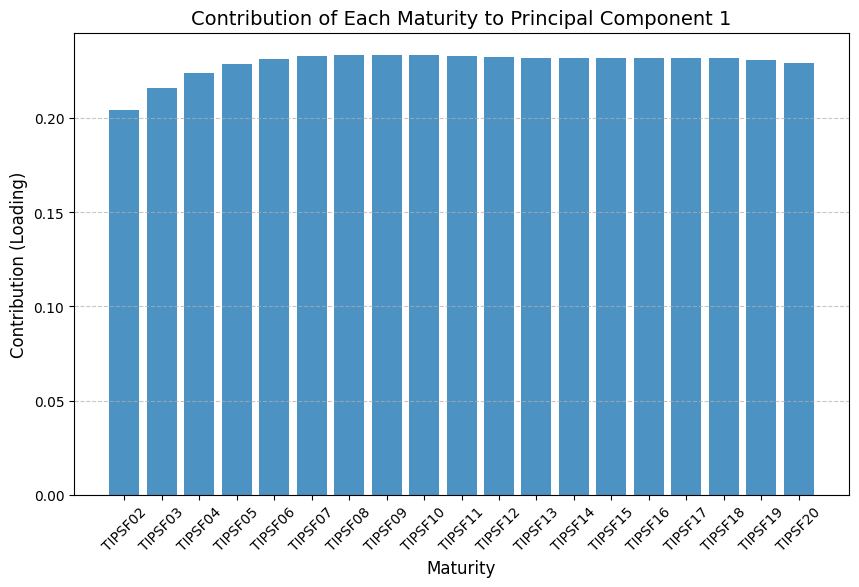

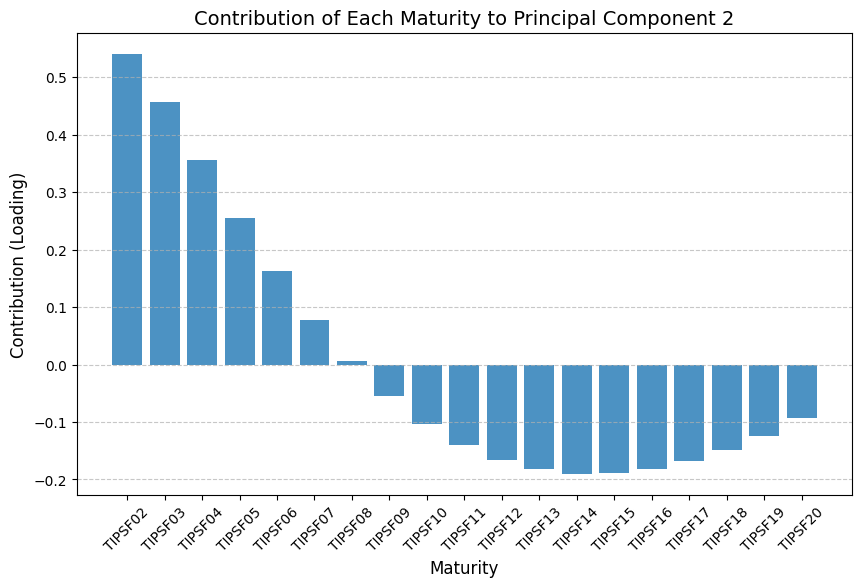

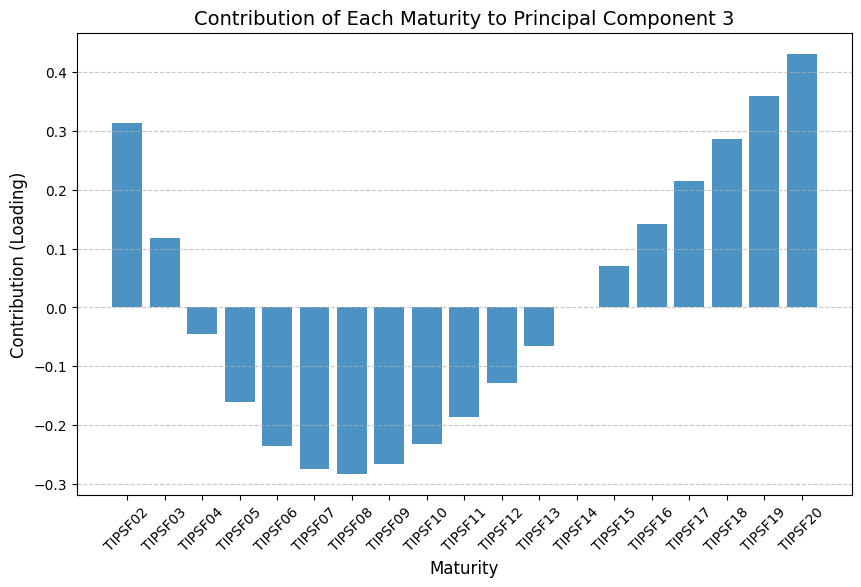

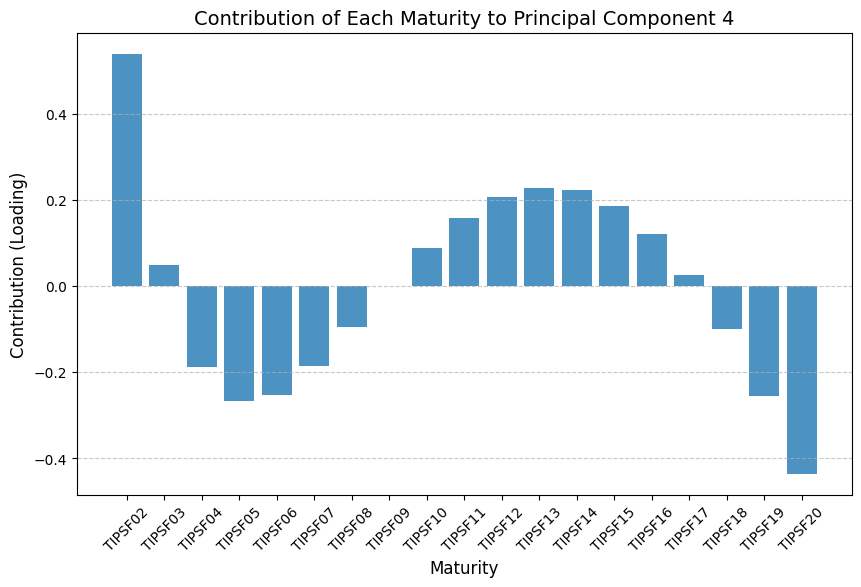

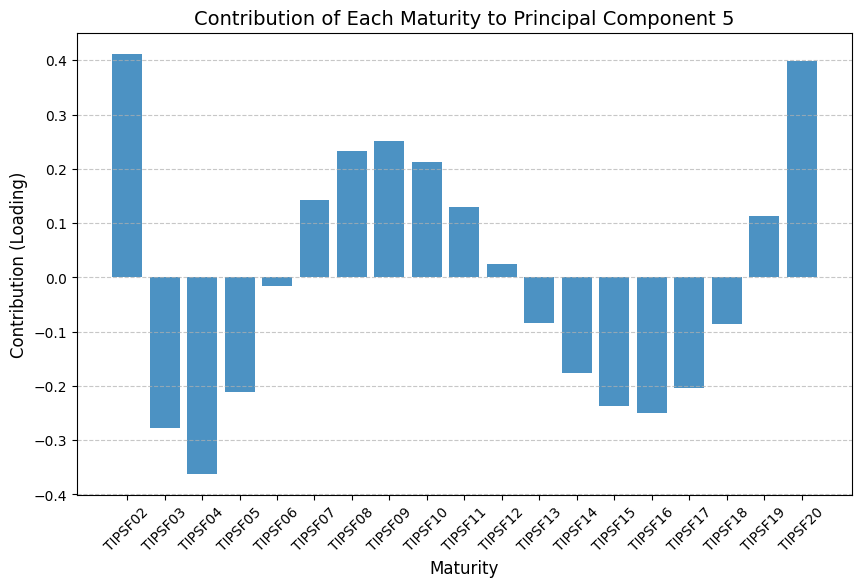

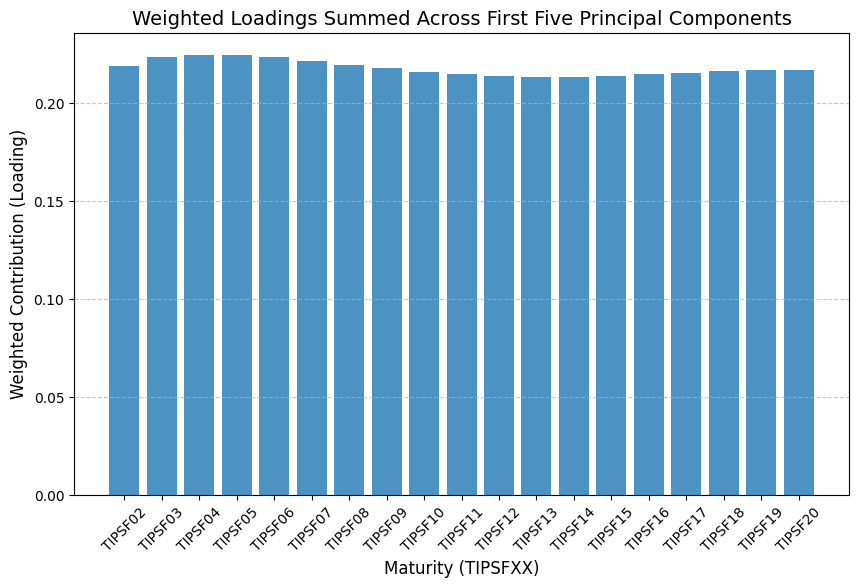

In [38]:
# Plot the contribution of each maturity to a specific principal component
def plot_component_contribution(loadings, component_index):
    """
    Plots the contribution of each maturity to a specific principal component.

    Args:
        loadings (DataFrame): PCA loadings.
        component_index (int): Index of the principal component (0 for PC1, 1 for PC2, etc.).
    """
    component_loadings = loadings.iloc[component_index]
    plt.figure(figsize=(10, 6))
    plt.bar(component_loadings.index, component_loadings.values, alpha=0.8)
    plt.title(f'Contribution of Each Maturity to Principal Component {component_index + 1}', fontsize=14)
    plt.xlabel('Maturity', fontsize=12)
    plt.ylabel('Contribution (Loading)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_component_contribution(loadings, component_index=0)  
plot_component_contribution(loadings, component_index=1)  
plot_component_contribution(loadings, component_index=2)  
plot_component_contribution(loadings, component_index=3)  
plot_component_contribution(loadings, component_index=4)   

# Compute weighted loadings for the first 5 PCs
weights = pca.explained_variance_ratio_[:5]  # Variance explained by the first 5 PCs
weighted_loadings = loadings.iloc[:5].multiply(weights, axis=0)  # Weight each row by its explained variance
weighted_sum = weighted_loadings.sum()  # Sum across the weighted loadings

# Plot the histogram of weighted loadings
plt.figure(figsize=(10, 6))
plt.bar(weighted_sum.index, weighted_sum.values, alpha=0.8)
plt.title("Weighted Loadings Summed Across First Five Principal Components", fontsize=14)
plt.xlabel("Maturity (TIPSFXX)", fontsize=12)
plt.ylabel("Weighted Contribution (Loading)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

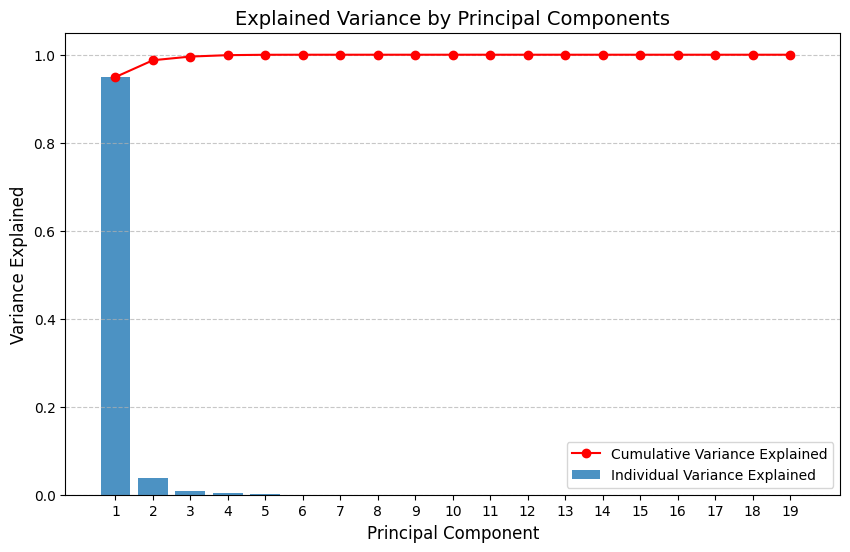

In [35]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))

plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.8, label="Individual Variance Explained")

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='r', label="Cumulative Variance Explained")

plt.title("Explained Variance by Principal Components", fontsize=14)
plt.xlabel("Principal Component", fontsize=12)
plt.ylabel("Variance Explained", fontsize=12)
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()
